## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler 
import random 
from matplotlib.colors import ListedColormap

# PART A: NEURAL NETWORK

In [2]:
class ANN():
    # CONSTRUCTOR OF THE ARTIFICIAL NEURAL NETWORK CLASS
    def __init__(self, data, parameters, pattern_classes):
        self.x = np.insert(data, 0, np.ones(data.shape[0]), axis=1) # add an extra column of 1's to account for bias = w0 
        self.w = parameters # note that dim(w)[1] = dim(data)[1] + 1 =  dim(x)[1] due to the bias 
        self.y = pattern_classes
        self.n_samples = self.x.shape[0]
        self.w_change = []
        self.mse_change = []
        self.learning_rate = 0.01
    
    # SIGMOID ACTIVATION_FUNCTION
    def activation_function(self, input):
        return 1/(1+np.exp(-input))
    
    #CALCULATE VALUE OF NODE BASED ON SIGMOID WITH FORWARD PROPAGATION
    def forward_propagation(self):
        y_hat = self.activation_function(np.dot(self.x,np.transpose(self.w)))
        return y_hat
    
    #CALCULATE VALUE OF NODE BASED ON SIGMOID WITH BACK PROPAGATION
    def back_propagation(self):
        y_hat = self.forward_propagation()
        loss = np.square((self.y - y_hat))
        update = (-2)*np.dot(np.transpose((self.y-y_hat)*y_hat*(1-y_hat)),self.x)
        return update
    
    #CALCULATE MEAN SQUARED ERROR USING FORWARD PROPAGATION 
    def calculate_mse(self): 
        y_hat = self.forward_propagation()
        mse = np.sum(np.square(self.y-y_hat))*1/self.n_samples
        return mse
    
    #UPDATE WEIGHT OF THE NETWORK AFTER BACK PROPAGATION
    def update_weight(self):
        self.w = self.w - self.learning_rate*self.back_propagation()
        self.w_change.append(self.w)
        self.mse_change.append(self.calculate_mse())
        
    #CHECK IF THERE IS ANY CHANGES IN THE VALUE OF THE NODES
    def converged(self):
        gradient = self.back_propagation()
        new_w = self.w - self.learning_rate*gradient
        return np.array_equiv(self.w, new_w)
    
    #ITERATE THE NETWORK
    def train(self):
        i = 0
        while (i <= 10):
            self.update_weight()
            i = i+1
        return self.w_change
        

# PART B: CALCULATE MEAN SQUARED ERROR
   data: data of vectors
   
   parameters: set of weights that is fitted into the neural network
   
   pattern_classes: 0/1 classification array that classifies data in type 0 or type 1

In [3]:
def find_mean_squared(data, parameters, pattern_classes):
    nn = ANN(data, parameters, pattern_classes)
    res = nn.calculate_mse()
    return res

read data from the csv file

In [4]:
iris = pd.read_csv(".\data\IRIS.csv")
data = iris[iris['species'].isin(["Iris-versicolor", "Iris-virginica"])].iloc[:, 2:4].values 
label_column = iris[iris['species'].isin(["Iris-versicolor", "Iris-virginica"])].iloc[:, [4]].values
pattern_classes = np.where(label_column == 'Iris-versicolor', 1, 0)
param = np.zeros((1,data.shape[1]+1))
print(find_mean_squared(data, param, pattern_classes))

0.25


## Calculate mean squared error and plot decision boundary for weight = 0

### weight 

In [5]:
w0 = np.zeros((1,data.shape[1]+1))
nn_0 = ANN(data, w0, pattern_classes)
mse_0 = find_mean_squared(data, w0, pattern_classes)
y_hat = nn_0.forward_propagation()

### plot 

In [6]:
def calculate_centroids():
    cluster_0 = []
    cluster_1 = []

    classifier = []

    for i in range(y_hat.shape[0]):
        if (y_hat[i] > 1/2):
            cluster_1.append(data[i])
            classifier.append(1)
        else:
            cluster_0.append(data[i])
            classifier.append(0)

    cluster_0 = np.array(cluster_0)
    cluster_1 = np.array(cluster_1)
    centroids_1 = np.sum(cluster_1)*1/cluster_1.shape[0] if cluster_1.shape[0] > 0 else 0
    centroids_0 = np.sum(cluster_0)*1/cluster_0.shape[0]

    return [np.array([centroids_0, centroids_1]), np.array(classifier)]

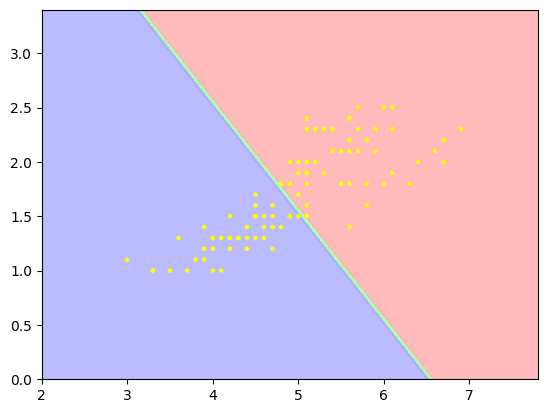

In [20]:
def plot_decision_boundaries(): 
    centroids = calculate_centroids()[0]
    classifier = calculate_centroids()[1]

    # Plot the clusters
    x_min, x_max = data[:, 0].min()-1, data[:, 0].max()+1
    y_min, y_max = data[:, 1].min()-1, data[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    assign_grid = np.zeros(xx.shape)
    
    for x in range(assign_grid.shape[0]):
        for y in range(assign_grid.shape[1]):
            assign_grid[x][y] = -1
            min_dist = float('inf') 
            for k in range(centroids.shape[0]):
                centroid = centroids[k]
                distance_to_k = np.sum(np.square(np.subtract(np.array([xx[x][y], yy[x][y]]), centroid)))
                if distance_to_k < min_dist:
                        min_dist = distance_to_k
                        assign_grid[x][y] = k

    cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    pcmap = ListedColormap(['yellow', 'green', 'blue'])

    plt.contourf(xx, yy, assign_grid, cmap=cmap, alpha=.8)
    plt.scatter(data[:, 0], data[:, 1], c = classifier, cmap=pcmap, s = 5)
    plt.show()

plot_decision_boundaries()




## Calculate mean squared error and plot decision boundary for weight in range -1 and 1 

### weight

In [8]:
w1 = []
for i in range(data.shape[1]+1):
    w1.append(random.uniform(-1,1))
w1 = np.array(w1)
nn_1 = ANN(data, w1, pattern_classes)
mse_1 = find_mean_squared(data, w1, pattern_classes)

y_hat = nn_1.forward_propagation()

### plot

In [12]:
w1 = []
for i in range(data.shape[1]+1):
    w1.append(random.uniform(-1,1))
w1 = np.array(w1)
nn_1 = ANN(data, w1, pattern_classes)
mse_1 = find_mean_squared(data, w1, pattern_classes)

y_hat = nn_1.forward_propagation()

def calculate_centroids():
    cluster_0 = []
    cluster_1 = []

    classifier = []

    for i in range(y_hat.shape[0]):
        if (y_hat[i] > 1/2):
            cluster_1.append(data[i])
            classifier.append(1)
        else:
            cluster_0.append(data[i])
            classifier.append(0)

    cluster_0 = np.array(cluster_0)
    cluster_1 = np.array(cluster_1)

    centroids_0 = np.sum(cluster_0)*1/cluster_0.shape[0]
    centroids_1 = np.sum(cluster_1)*1/cluster_1.shape[0] if cluster_1.shape[0] > 0 else 0


    return [np.array([centroids_0, centroids_1]), np.array(classifier)]



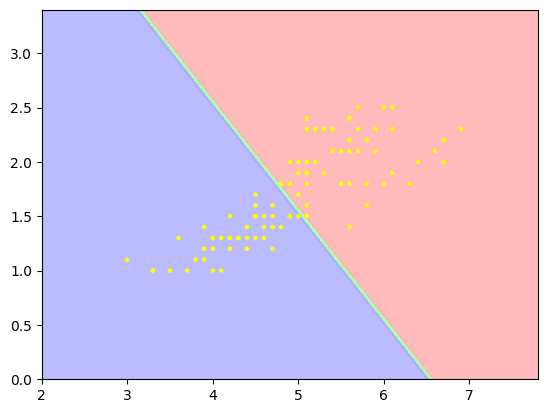

In [21]:
def plot_decision_boundaries():
    centroids = calculate_centroids()[0]
    classifier = calculate_centroids()[1]

    # Plot the clusters
    x_min, x_max = data[:, 0].min()-1, data[:, 0].max()+1
    y_min, y_max = data[:, 1].min()-1, data[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    assign_grid = np.zeros(xx.shape)
    
    for x in range(assign_grid.shape[0]):
        for y in range(assign_grid.shape[1]):
            assign_grid[x][y] = -1
            min_dist = float('inf') 
            for k in range(centroids.shape[0]):
                centroid = centroids[k]
                distance_to_k = np.sum(np.square(np.subtract(np.array([xx[x][y], yy[x][y]]), centroid)))
                if distance_to_k < min_dist:
                        min_dist = distance_to_k
                        assign_grid[x][y] = k

    cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    pcmap = ListedColormap(['yellow', 'green', 'blue'])

    plt.contourf(xx, yy, assign_grid, cmap=cmap, alpha=.8)
    plt.scatter(data[:, 0], data[:, 1], c = classifier, cmap=pcmap, s = 5)
    plt.show()

plot_decision_boundaries()

